# Fluiddyn: open-source, open-science and Python for the fluid dynamics community

Pierre Augier

## Issues

- Open-science? Open-data? Open-source?

- Reusable code in sciences?

- Benefit from recent and future software and hardward developments?

## Some answers

- good coding practices, forges, documentation, unittests, continuous integration, benchmarking
- specialized libraries by and for scientific communities (oriented towards subjects)

  * [astropy](http://www.astropy.org/) (astronomy)
  * [obspy](https://github.com/obspy/obspy/wiki) (seismology)
  * [biopython](https://github.com/biopython/biopython) (molecular biology)
  * atmospheric and oceanic sciences (see for example [this post](https://drclimate.wordpress.com/2016/10/04/the-weatherclimate-python-stack/))

Only the beginning of this trend in fluid mechanics.

## Fluid mechanics

Science of flows. 

### Many applications!

- wake of vehicles (drag, noise, ...)
- technological flows
- biological flows
- geophysical flows

### Methods

- Experiments
- Analytical computations
- Numerical simulations

  * Strong dominance of **Fortran** and **Matlab**
  * Close-source and old-school open-source software
  * Open-science and open-data still weak

## FluidDyn project: a suite of Python packages for fluid dynamics

Open-source, documented, tested, continuous integration

- [fluiddyn](https://foss.heptapod.net/fluiddyn/fluiddyn): base package containing utilities
- [fluidlab](https://foss.heptapod.net/fluiddyn/fluidlab): control of laboratory experiments
- [fluidimage](https://foss.heptapod.net/fluiddyn/fluidimage): scientific treatments of images (PIV)
- [fluidfft](https://foss.heptapod.net/fluiddyn/fluidfft): C++ / Python Fourier transform library (highly distributed, MPI, CPU/GPU, 2D and 3D)
- [fluidsim](https://foss.heptapod.net/fluiddyn/fluidsim): pseudo-spectral simulations in 2D and 3D
- [fluidfoam](https://github.com/fluiddyn/fluidfoam): Python utilities for openfoam

Main developpers: Pierre Augier (LEGI), Cyrille Bonamy (LEGI), Antoine Campagne (LEGI), Ashwin Vishnu (KTH), Julien Salort (ENS Lyon).


## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

In collaboration with a group from KTH (Stockholm): Erik Lindborg, Antoine Campagne, Joël Sommeria, Pierre Augier, ...

## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

## [fluidlab](https://foss.heptapod.net/fluiddyn/fluidlab): control of experiments in fluid mechanics

(in collaboration with Julien Salors, ENS Lyon)

### Physical experiments can be seen as the interaction of autonomous physical objects

Examples of the MILESTONE experiments:
- moving carriage, motor (Modbus TCP), position sensor (quadrature signal)
- probes attached to a transverses (Modbus TCP)

- scanning Particle Image Velocimetry (PIV):
  - oscillating mirror driven by an acquisition board
  - cameras triggered by a signal produced by an acquisition board

Issue: control with computers the interaction and synchronization of the objects

## [fluidlab](https://foss.heptapod.net/fluiddyn/fluidlab): control of experiments in fluid mechanics

(in collaboration with Julien Salors, ENS Lyon)

### Physical experiments can be seen as the interaction of autonomous physical objects

- Object-oriented programming
- Very easy to write instrument drivers
- Automatic documentation for the instrument drivers
- Simple servers with the Python package `rcpy`

#### Example for the carriage
- `motor.py`
- `position_sensor.py`
- `position_sensor_server.py`
- `position_sensor_client.py`
- `carriage.py`
- `carriage_server.py`
- `carriage_client.py`


## [fluidlab](https://foss.heptapod.net/fluiddyn/fluidlab): control of experiments in fluid mechanics
A little bit of Graphical User Interface is easy, fun and useful. We use PyQt.

# Processing of experimental data 
(in particular large series of images)

- copy into the LEGI cluster disks, reorganization and format conversions (in parallel to saturate the fast connexion)
- preprocessing of images: png -> png (calcul on the LEGI cluster)
- scientific treatment of images and other data (calcul on the LEGI cluter)
- production of scientific figures

## [fluidimage](https://foss.heptapod.net/fluiddyn/fluidimage): scientific treatments of images

(in collaboration with Cyrille Bonamy and Antoine Campagne, LEGI)

Software for images preprocessing and Particle Image Velocimetry (PIV) computation

Many images (~ 20 To of raw data): embarrassingly parallel problem

- Clusters and PC
- CPU/GPU
- **Asynchronous** computations (**topologies** of treatments, IO and CPU bounded parts are splitted, compatible with big data frameworks as Storm)
- Efficient algorythms and tools for fast computation with Python (Pythran, Theano, Pycuda, ...)

### 2D and scanning stereo PIV

### Utilities to display and analyze the PIV fields

- Plots of PIV fields (similar to PivMat, a Matlab library by F. Moisy) 
- Calcul of spectra, anisotropic structure functions, characteristic turbulent length scales

## Calcul of scanning PIV on the LEGI cluster

Example of scripts to launch a PIV computation:

```python

from fluidimage.topologies.piv import TopologyPIV

params = TopologyPIV.create_default_params()

params.series.path = '../../image_samples/Karman/Images'
params.series.ind_start = 1
params.piv0.shape_crop_im0 = 32
params.multipass.number = 2
params.multipass.use_tps = True
# params.saving.how has to be equal to 'complete' for idempotent jobs
# (on clusters)
params.saving.how = 'complete'
params.saving.postfix = 'piv_complete'

topology = TopologyPIV(params, logging_level='info')
topology.compute()
```

**Remark:** parameters in an instance of `fluiddyn.util.paramcontainer.ParamContainer`. Much better than in text files or free Python variables!

- avoid typing errors
- the user can easily look at the available parameters and their default value
- documentation for the parameters (for example for the [PIV topology](http://fluidimage.readthedocs.io/en/latest/generated/fluidimage.topologies.piv.html#module-fluidimage.topologies.piv))

## Calcul of scanning PIV on the LEGI cluster

Remark: launching computations on cluster is highly simplified by using fluiddyn:

```python
from fluiddyn.clusters.legi import Calcul7 as Cluster

cluster = Cluster()

cluster.submit_script(
    'piv_complete.py', name_run='fluidimage',
    nb_cores_per_node=8,
    walltime='3:00:00',
    omp_num_threads=1,
    idempotent=True, delay_signal_walltime=300)
```


## Analysis and production of scientific figures

- Mainly using the core scientific Python packages (numpy, scipy and matplotlib)
- For one experiments, a lot of different files for different types of data (txt and hdf5 files)
- Classes for
  * experiments
  * types of data (for example probe data or PIV field).

In [1]:
# this ipython command loads a special backend for notebooks
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from fluidcoriolis.milestone import Experiment
iexp = 70
exp = Experiment(iexp)
exp.name

'Exp70_2016-07-13_N0.8_L6.0_V0.08_piv3d'

In [3]:
print('N = {} rad/s and Uc = {} m/s'.format(exp.N, exp.Uc))

N = 0.8 rad/s and Uc = 0.08 m/s


In [4]:
print('R = {:.0f} and Fh = {:.2f}'.format(exp.Rc, exp.Fhc))

R = 3200 and Fh = 0.40


In [5]:
from fluidcoriolis.milestone.time_signals import TimeSignals
signals = TimeSignals(iexp)

Experiment 70
Probe on the carriage without correction in temperature.
Probe at the surface with correction in temperature.
Probe at the bottom with correction in temperature.
Probe on the left without correction in temperature.
Probe on the right with correction in temperature.


<IPython.core.display.Javascript object>


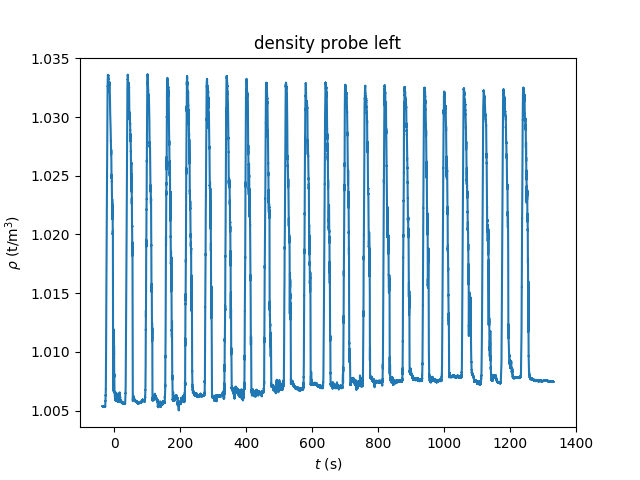

In [6]:
signals.probe_left.plot_density()

<IPython.core.display.Javascript object>


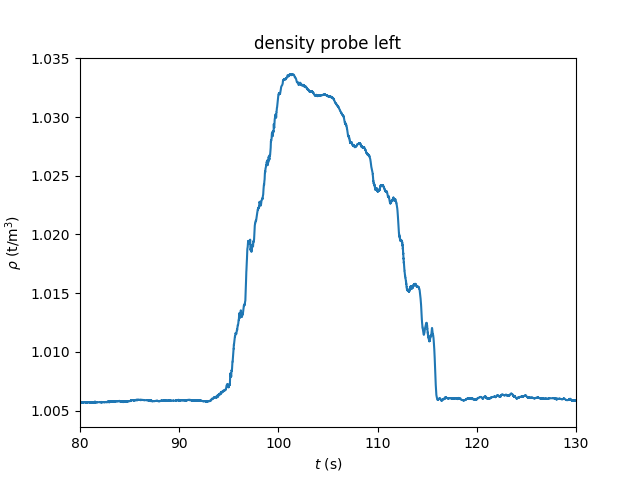

In [7]:
signals.probe_left.plot_density()
_ = plt.xlim([80, 130])

<IPython.core.display.Javascript object>


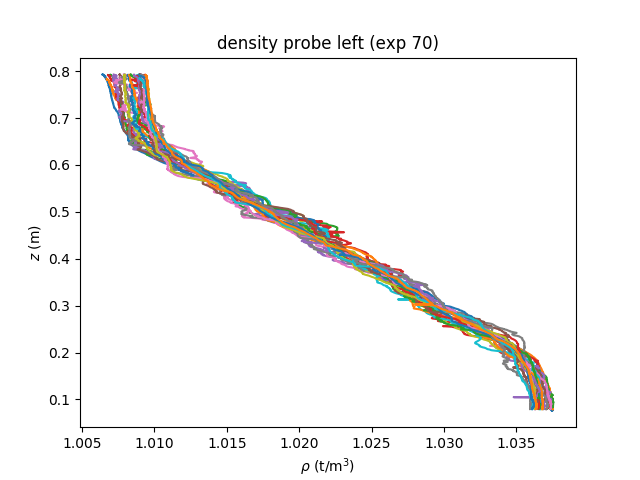

In [8]:
signals.probe_left.plot_profiles()

## Studying and plotting PIV data

In [9]:
pack = exp.get_piv_pack()


In [10]:
piv_fields = pack.get_piv_array_toverT(2)
piv_fields = piv_fields.truncate(4).gaussian_filter(0.5)

/home/pierre/16MILESTONE/Data_light/PCO_top/Exp70_2016-07-13_N0.8_L6.0_V0.08_piv3d/v_exp70_t02.h5


<IPython.core.display.Javascript object>


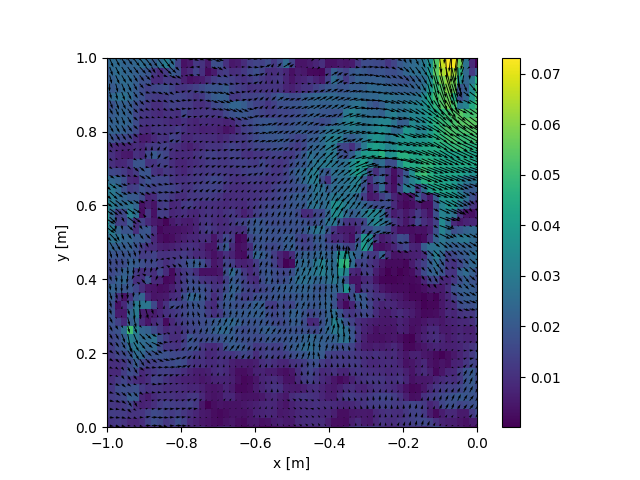

In [11]:
piv = piv_fields[10]
piv.display()
plt.xlim([-1, 0])
_ = plt.ylim([0, 1])

**Partial conclusion:** Open-data, data in auto-descriptive formats (hdf5, netcdf, ...) + code to use and understand the data.

# Numerical simulations

Navier-Stokes equations + other terms...

## [fluidfft](https://foss.heptapod.net/fluiddyn/fluidfft): unified API (C++ / Python) for Fast Fourier Transform libraries (highly distributed, MPI, CPU and GPU, 2D and 3D)

## [fluidsim](https://foss.heptapod.net/fluiddyn/fluidsim): pseudo-spectral simulations in 2D and 3D

- highly modular (object oriented solvers)
- efficient (Cython, Pythran, mpi4py, h5py)
- inline data processing

## Conclusions

1. Science in fluid mechanics with open-source methods and Python

3. Development of *open-source*, *clean*, *reusable* codes (fluiddyn project)

**Issues** 

- Collaborative dynamics? Adoption by scientists? Developpers?
- Level in Python and coding in the community ! => [Python training sessions in the lab and at university](https://python-uga.sciencesconf.org/)